In [48]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import plotly.express as px


In [49]:
# Load the dataset
file_path = 'Bankcurpcy.csv'  # Replace with your dataset's file path
data = pd.read_csv(file_path)

# Display dataset information (Optional)
data.head()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6   class                   250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [51]:
data.duplicated().sum()


147

In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
data.count()


industrial_risk           103
 management_risk          103
 financial_flexibility    103
 credibility              103
 competitiveness          103
 operating_risk           103
class                     103
dtype: int64

In [ ]:
data.isnull().sum()


industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
class                     0
dtype: int64

In [ ]:
data.describe()


,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.485437,0.563107,0.504854,0.582524,0.640777,0.514563
std,0.404971,0.412308,0.405206,0.377668,0.410747,0.439788
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'industrial_risk'}>,
        <Axes: title={'center': ' management_risk'}>],
       [<Axes: title={'center': ' financial_flexibility'}>,
        <Axes: title={'center': ' credibility'}>],
       [<Axes: title={'center': ' competitiveness'}>,
        <Axes: title={'center': ' operating_risk'}>]], dtype=object)

<Figure size 640x480 with 0 Axes>

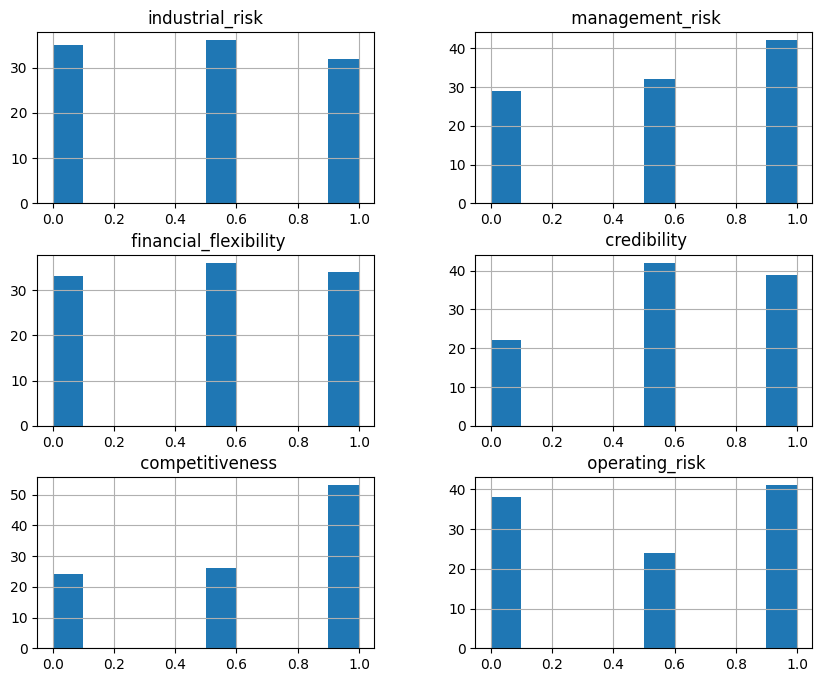

In [56]:
plt.tight_layout()
data.hist(figsize=(10, 8))


In [57]:
data['class'].unique()


array(['bankruptcy', 'non-bankruptcy'], dtype=object)

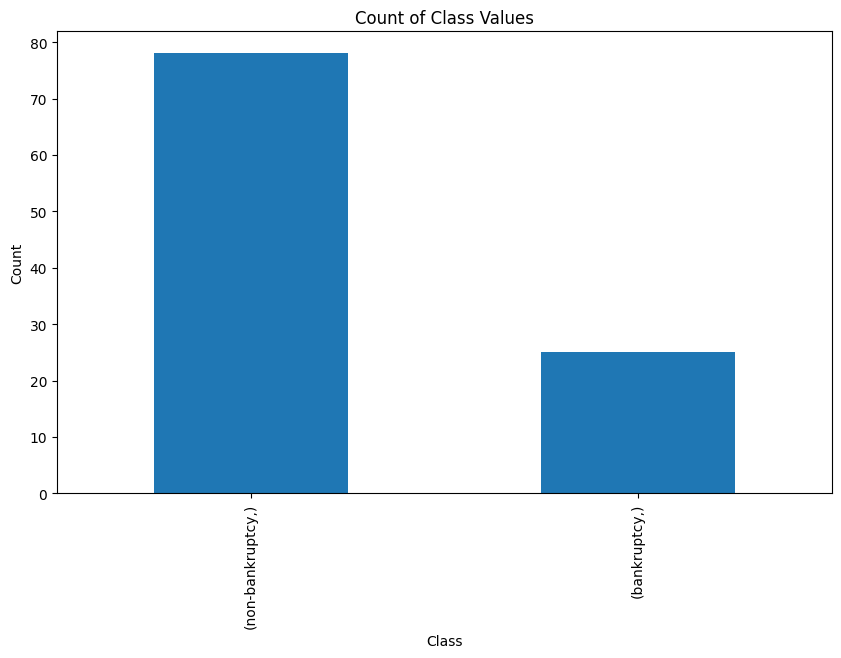

In [58]:
data
plt.figure(figsize=(10,6))
data.iloc[:,-1:].value_counts().plot(kind='bar')
plt.title('Count of Class Values')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


<Axes: >

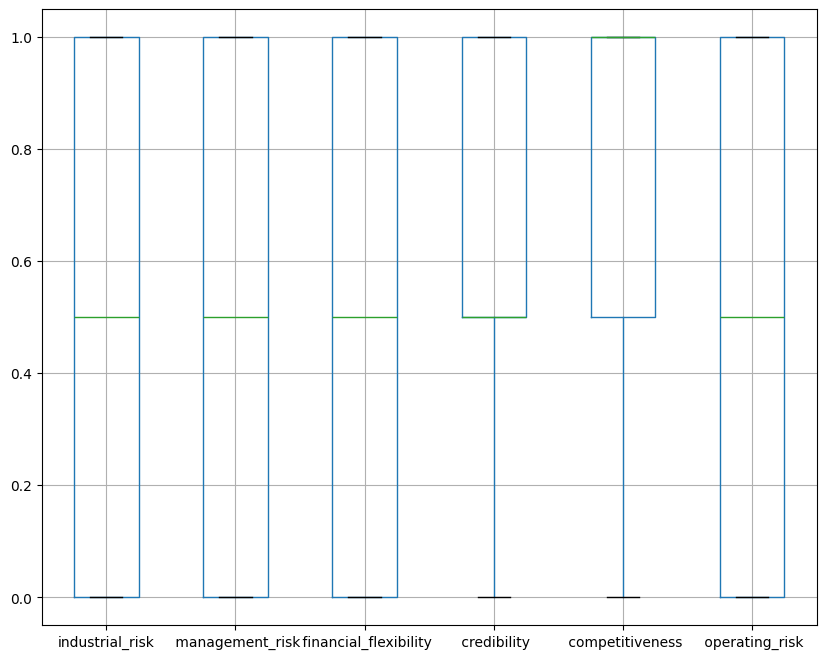

In [59]:
data.boxplot(figsize=(10, 8))


In [60]:
# Ensure correct column names (strip leading/trailing spaces)
data.columns = data.columns.str.strip()


In [61]:

# Chart 1: Scatter plot of industrial_risk vs management_risk
fig1 = px.scatter(data, x='industrial_risk', y='management_risk', color='class',title="Industrial Risk vs Management Risk")
fig1.show()


In [62]:
# Chart 2: Box plot for industrial_risk grouped by class
fig2 = px.box(data, x='class', y='industrial_risk', color='class',title="Box Plot of Industrial Risk by Class")
fig2.show()


In [63]:

# Chart 3: Histogram of credibility
fig3 = px.histogram(data, x='credibility', color='class', barmode='overlay',
                    title="Histogram of Credibility")
fig3.show()


In [64]:
# Chart 4: Heatmap of correlation between features
correlation = data.drop(columns="class").corr()
fig4 = px.imshow(correlation, text_auto=True, title="Feature Correlation Heatmap")
fig4.show()


In [65]:


# Chart 5: Line chart of industrial_risk and operating_risk
fig5 = px.line(data, x=data.index, y=['industrial_risk', 'operating_risk'], 
               title="Line Chart of Industrial Risk and Operating Risk")
fig5.show()


In [66]:
# Chart 6: Pairplot of all numerical features
fig6 = px.scatter_matrix(data, dimensions=['industrial_risk', 'management_risk', 
                                           'financial_flexibility', 'credibility', 
                                           'competitiveness', 'operating_risk'],
                         color='class', title="Scatter Matrix of Features")
fig6.show()


In [67]:
# Chart 7: Pie chart of class distribution
fig7 = px.pie(data, names='class', title="Class Distribution")
fig7.show()


In [68]:
# Chart 8: Violin plot of financial_flexibility grouped by class
fig8 = px.violin(data, y='financial_flexibility', x='class', color='class',
                 box=True, points='all', title="Violin Plot of Financial Flexibility by Class")
fig8.show()


In [69]:
# Chart 9: Bar chart of average competitiveness by class
avg_competitiveness = data.groupby('class')['competitiveness'].mean().reset_index()
fig9 = px.bar(avg_competitiveness, x='class', y='competitiveness', color='class',
              title="Average Competitiveness by Class")
fig9.show()


In [70]:
# Chart 10: Density contour plot of industrial_risk and credibility
fig10 = px.density_contour(data, x='industrial_risk', y='credibility', color='class',
                           title="Density Contour of Industrial Risk and Credibility")
fig10.show()


In [71]:
# Chart 11: Treemap of class distribution
fig11 = px.treemap(data, path=['class'], values='industrial_risk',
                   title="Treemap of Class Distribution by Industrial Risk")
fig11.show()


In [72]:
# Chart 12: Sunburst chart of class by competitiveness
fig12 = px.sunburst(data, path=['class', 'competitiveness'], values='operating_risk',
                    title="Sunburst Chart of Class by Competitiveness and Operating Risk")
fig12.show()


In [73]:
data 
label_encoder = LabelEncoder()
target_label_encoded = label_encoder.fit_transform(data["class"])


In [74]:
# Chart 13: Parallel coordinates plot for feature relationships
fig13 = px.parallel_coordinates(data, color= target_label_encoded,
                                dimensions=['industrial_risk', 'management_risk', 
                                            'financial_flexibility', 'credibility', 
                                            'competitiveness', 'operating_risk'],
                                color_continuous_scale=px.colors.diverging.Tealrose,
                                title="Parallel Coordinates Plot of Features")
fig13.show()


In [75]:
# Chart 14: Polar chart for average risks per class
avg_data = data.groupby('class').mean().reset_index()
fig14 = px.line_polar(avg_data, r=['industrial_risk', 'management_risk', 
                                   'operating_risk'], theta=['industrial_risk', 
                                   'management_risk', 'operating_risk'], 
                      line_close=True,
                      title="Polar Chart of Average Risks per Class")
fig14.show()


In [76]:
# Chart 15: Bubble chart for industrial_risk vs competitiveness
fig15 = px.scatter(data, x='industrial_risk', y='competitiveness', size='operating_risk', 
                   color='class', title="Bubble Chart of Industrial Risk vs Competitiveness",
                   hover_data=['financial_flexibility', 'credibility'])
fig15.show()


In [77]:
# Preprocessing
# Separate features and target variable
X = data.drop(columns=['class'])
y = data['class']


In [78]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [79]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [80]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [81]:


# Model Training: Initial Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate initial model
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Initial Model Accuracy:", accuracy)


Initial Model Accuracy: 1.0



Initial Model Classification Report:

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



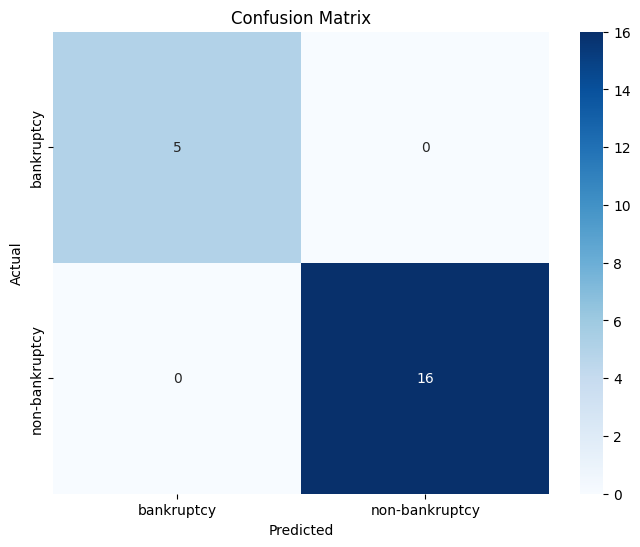

In [82]:
# Classification report and confusion matrix
print("\nInitial Model Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [83]:

# Hyperparameter Tuning: Grid Search with Cross-Validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best model and parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits



Best Model Accuracy: 1.0

Best Model Classification Report:

                precision    recall  f1-score   support

    bankruptcy       1.00      1.00      1.00         5
non-bankruptcy       1.00      1.00      1.00        16

      accuracy                           1.00        21
     macro avg       1.00      1.00      1.00        21
  weighted avg       1.00      1.00      1.00        21



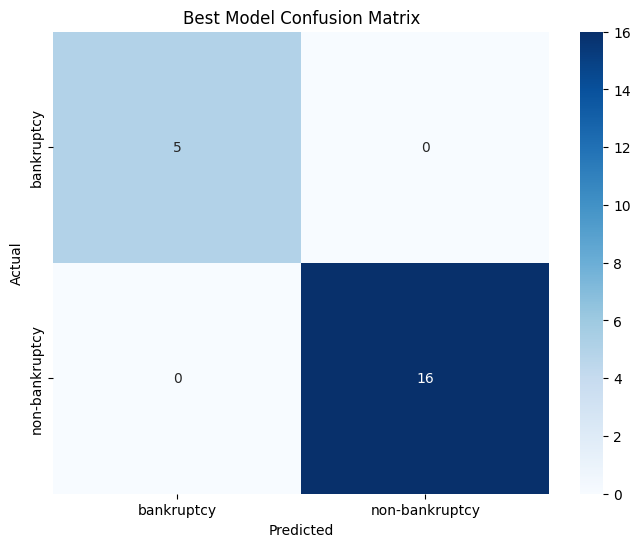

In [84]:
# Evaluate the tuned model
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)
print("\nBest Model Accuracy:", best_accuracy)
print("\nBest Model Classification Report:\n")
print(classification_report(y_test, y_pred_best, target_names=label_encoder.classes_))

# Confusion matrix for the best model
best_conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Best Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# model_path = 'best_rf_model.pkl'
# joblib.dump(best_model, model_path)
# print(f"Best model saved to {model_path}")


Best model saved to best_rf_model.pkl
